# Projet RCP 209 : prédiction de rendement de stock

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accuracy function

In [2]:
def CFM_metrics(y_true, y_pred):
    """
    Return the metrics used for the CFM Data Challenge 2019.

    This metrics is simply the accuracy of the prediction of positive returns
    (see below for details), but based on true *returns* (y_true) and
    probabilities (of returns being positive).

    Args
        y_true: Pandas Dataframe
            target returns. Positive returns will give True, and negative ones False.

        y_pred: Pandas Dataframe
            predicted probability of positive returns.

    """
    return ((y_true.values > 0) == (y_pred.values > 0.5)).mean()

# Get data

In [3]:
data_test = pd.read_csv("data_stock\\test_input.csv", sep=',')
data_train = pd.read_csv("data_stock\\training_input.csv", sep=',')
output_train = pd.read_csv("data_stock\\training_output.csv", sep=',')

# Clean the data

In [4]:
data_train.head()

,ID,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,...,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,...,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022
1,1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,...,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557
2,2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,...,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346
3,3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,...,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833
4,4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,...,0.631221,0.090185,-0.169416,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209


In [5]:
data_train.shape, data_test.shape, output_train.shape

((745327, 74), (319769, 74), (745327, 2))

In [7]:
data_train[["eqt_code","date"]].nunique()

eqt_code     680
date        1511
dtype: int64

# Premiere analyse

In [8]:
nb_donnee = data_train.iloc[:,3:].size
nb_nan = data_train.iloc[:,3:].isna().sum().sum()
nb_donnee,nb_nan,nb_nan/nb_donnee * 100

(52918217, 347646, 0.6569495718270326)

In [16]:
#we linearly interpolate the NaN for the volatility and extrapolate to 0 
data_train.iloc[:,3:57] = data_train.iloc[:,3:].interpolate(axis=1)
data_test.iloc[:,3:57]  = data_test.iloc[:,3:].interpolate(axis=1)
#we use a flat extrapolation
data_train.fillna(0,inplace=True)
data_test.fillna(0,inplace=True)

In [14]:
#check if there is some NaN
#NAs = pd.concat([data_train.isnull().sum(), data_test.isnull().sum()], axis=1, keys=['Train', 'Test'])
#NAs[NAs.sum(axis=1) > 0]

In [17]:
#drop not necessary data
data_train_clean = data_train.drop(['ID', 'eqt_code', 'date'], axis=1, inplace=False)
data_test_clean = data_test.drop(['ID', 'eqt_code', 'date'], axis=1, inplace=False)

In [35]:
from sklearn.linear_model import LinearRegression
regrLinWeighted = LinearRegression()
regrLinWeighted.fit(data_train_clean, output_train["end_of_day_return"].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print('Train error =', round(CFM_metrics(pd.DataFrame(data=train_y), pd.DataFrame(regrLinWeighted.predict(output_train["end_of_day_return"].values))), 4), '%')
print('Test error  =', round(CFM_metrics(pd.DataFrame(data=test_y), pd.DataFrame(data=regrLinWeighted.predict(test_X))), 4), '%')

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.964025 -0.583286  2.191065 ...  0.067532 -0.19649  -0.795607].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
prediction = regrLinWeighted.predict(data_test_clean)

In [28]:
data_test_clean["PREDICT"] = prediction

In [29]:
data_test_clean.to_csv('predictions.csv', sep=';', index=False)

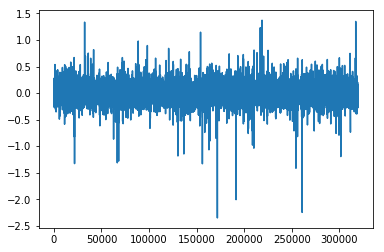

In [30]:
plt.plot(prediction)